# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 1) 데이터 불러오기 및 데이터 선택

In [ ]:
# 데이터 로드
data = pd.read_csv("/content/drive/MyDrive/ESAA/dataset/abalone.csv")

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

In [ ]:
data.head(3)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,True,False,False
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,True,False,False
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,False,True,False


## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [ ]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

In [ ]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [ ]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [ ]:
#릿지모델 생성 및 훈련
ridge=Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

#예측값 구하기
y_preds=ridge.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_preds = y_preds+1.5

#MSE와 RMSE구하기
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))

MSE:7.125, RMSE:2.669


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [ ]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [ ]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함
for alpha in alphas:
  ridge=Ridge(alpha=alpha)

  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
  neg_mse_scores=cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
  rmse_scores=np.sqrt(-1*neg_mse_scores)
  avg_rmse=np.mean(rmse_scores)
  print( 'alpha {0} 일 때 5 folds의 평균 RMSE: {1:.3f}'. format(alpha, avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE: 2.202
alpha 0.1 일 때 5 folds의 평균 RMSE: 2.199
alpha 1 일 때 5 folds의 평균 RMSE: 2.204
alpha 10 일 때 5 folds의 평균 RMSE: 2.348
alpha 100 일 때 5 folds의 평균 RMSE: 2.614


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [ ]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [ ]:
#모델 생성 및 훈련
xgb_reg=XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train, y_train)

#예측값 구하기
y_preds=xgb_reg.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_preds=y_preds+1.5

#MSE와 RMSE 구하기
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))

MSE:7.793, RMSE:2.792


extra) 피처 중요도 시각화

<Axes: xlabel='None', ylabel='None'>

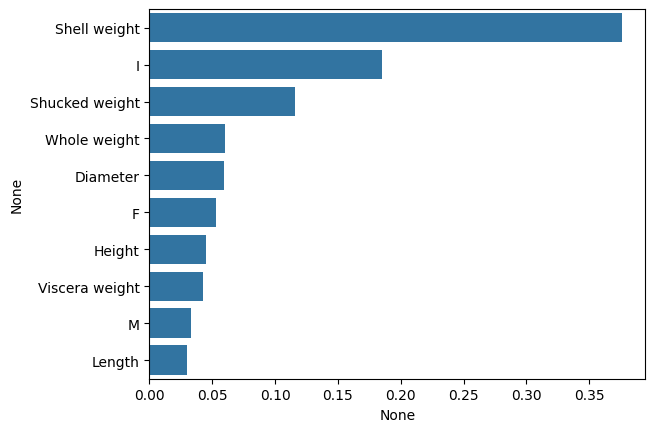

In [ ]:
import seaborn as sns
%matplotlib inline

feature_series=pd.Series(data=xgb_reg.feature_importances_, index=data.columns)
feature_series=feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [ ]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [ ]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=123)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [ ]:
model = LogisticRegression(multi_class='multinomial')
model.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [ ]:
#기울기
model.coef_

array([[-1.99751386e-01,  3.65451311e-01,  1.49472420e-01,
        -1.88027207e-01, -2.28494295e-02,  1.95456870e-01,
         4.66702169e-01, -1.66796937e-02,  8.23898772e-02,
         6.75013601e-02, -1.92622133e-02,  2.94916328e-01,
         7.42521868e-03],
       [ 5.96476718e-01, -7.88674281e-01, -1.26181715e-01,
         2.12254366e-01, -1.13503885e-02,  3.15786530e-01,
         3.55148678e-01,  3.34676039e-02,  2.79036200e-01,
        -1.17202715e+00,  2.61166174e-01,  4.64732433e-01,
        -8.33633942e-03],
       [-3.96725333e-01,  4.23222970e-01, -2.32907053e-02,
        -2.42271599e-02,  3.41998181e-02, -5.11243400e-01,
        -8.21850846e-01, -1.67879102e-02, -3.61426078e-01,
         1.10452579e+00, -2.41903960e-01, -7.59648761e-01,
         9.11120744e-04]])

In [ ]:
#절편
model.intercept_

array([-0.04177844,  0.09551062, -0.05373218])

3-3) 모델의 정확도를 구하세요.

In [ ]:
#모델의 예측값 구하기
y_pred = model.predict(x_test)

#모델의 정확도 구하기
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.9629629629629629
